In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ikhsanalfajar","key":"cd943f889af08e53aeff1b694cee17f6"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d yutodennou/diffusion-index-in-japan

  0% 0.00/10.4k [00:00<?, ?B/s]
100% 10.4k/10.4k [00:00<00:00, 22.5MB/s]


In [4]:
!mkdir diffusion-index-in-japan
!unzip diffusion-index-in-japan.zip -d diffusion-index-in-japan
!ls diffusion-index-in-japan

Archive:  diffusion-index-in-japan.zip
  inflating: diffusion-index-in-japan/diffusion_index_in_japan.csv  
diffusion_index_in_japan.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('diffusion-index-in-japan/diffusion_index_in_japan.csv')

In [7]:
df.head()

,DI,year,month,day,Total,HouseholdTrend,HouseholdTrend_Retail,HouseholdTrend_FoodService,HouseholdTrend_Services,HouseholdTrend_Housing,CorporateTrend,CorporateTrend_Manufacturing,CorporateTrend_NonManufacturing,Employment
0,Current Conditions,2023,8,25,53.6,54.0,54.3,52.6,55.8,44.7,51.7,48.8,53.8,54.7
1,Current Conditions,2023,7,25,54.4,54.5,53.6,55.8,57.5,47.7,53.5,50.2,56.4,55.7
2,Current Conditions,2023,6,25,53.6,53.6,50.1,57.4,60.7,49.5,53.3,50.1,55.8,54.1
3,Current Conditions,2023,5,25,55.0,54.9,53.1,61.1,59.2,45.4,54.3,51.2,56.8,57.1
4,Current Conditions,2023,4,25,54.6,54.9,53.2,59.9,59.1,46.1,53.2,49.6,56.7,55.8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DI                               520 non-null    object 
 1   year                             520 non-null    int64  
 2   month                            520 non-null    int64  
 3   day                              520 non-null    int64  
 4   Total                            520 non-null    float64
 5   HouseholdTrend                   520 non-null    float64
 6   HouseholdTrend_Retail            520 non-null    float64
 7   HouseholdTrend_FoodService       520 non-null    float64
 8   HouseholdTrend_Services          520 non-null    float64
 9   HouseholdTrend_Housing           520 non-null    float64
 10  CorporateTrend                   520 non-null    float64
 11  CorporateTrend_Manufacturing     520 non-null    float64
 12  CorporateTrend_NonManu

<Axes: >

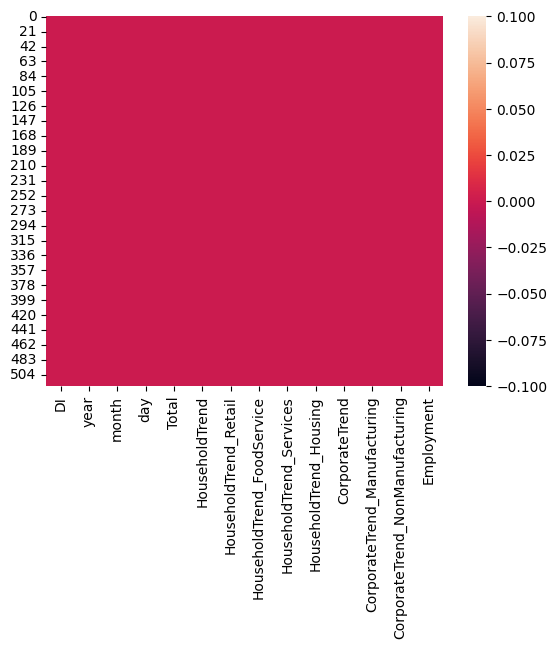

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.describe()

,year,month,day,Total,HouseholdTrend,HouseholdTrend_Retail,HouseholdTrend_FoodService,HouseholdTrend_Services,HouseholdTrend_Housing,CorporateTrend,CorporateTrend_Manufacturing,CorporateTrend_NonManufacturing,Employment
count,520.000000,520.000000,520.0,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,2012.338462,6.438462,25.0,45.905385,45.195000,44.591346,43.958654,46.788269,45.018654,46.115962,45.945192,46.323654,50.123654
std,6.262780,3.442909,0.0,7.560564,7.386005,7.292159,9.303278,7.830809,7.380494,7.597492,7.279267,8.159076,10.174999
min,2002.000000,1.000000,25.0,8.300000,7.800000,10.500000,-2.400000,4.300000,9.900000,10.900000,13.200000,9.200000,6.300000
25%,2007.000000,3.000000,25.0,43.100000,42.600000,41.900000,39.800000,44.150000,42.000000,43.800000,43.600000,43.500000,46.100000
50%,2012.000000,6.000000,25.0,47.700000,46.850000,46.300000,46.300000,48.600000,46.100000,47.350000,47.300000,47.800000,52.900000
75%,2018.000000,9.000000,25.0,50.825000,49.800000,49.100000,49.225000,51.500000,49.700000,51.000000,50.600000,51.600000,56.700000
max,2023.000000,12.000000,25.0,58.300000,59.000000,59.900000,69.700000,61.600000,62.800000,60.100000,59.500000,60.800000,65.800000


<ipython-input-15-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

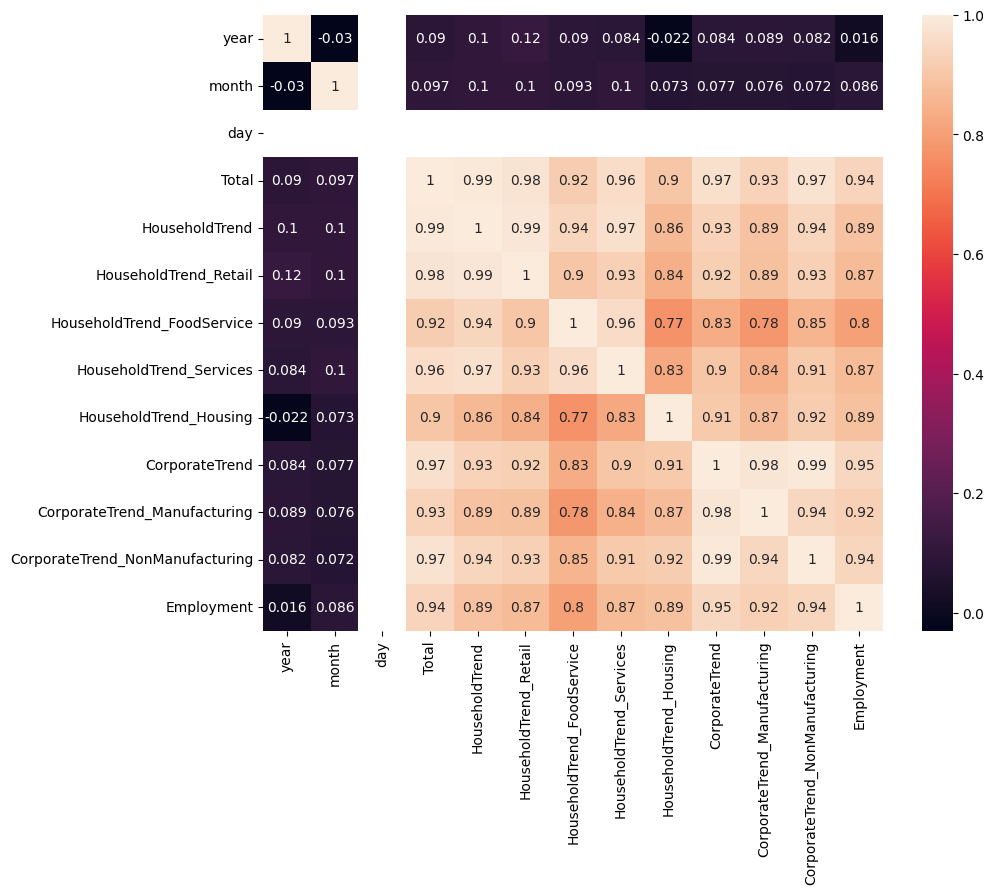

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [16]:
Household = df.groupby('HouseholdTrend').count()[['HouseholdTrend_Housing']].sort_values(by='HouseholdTrend_Housing').reset_index()
Household = Household.rename(columns={'HouseholdTrend_Housing':'Trend'})

<Axes: xlabel='HouseholdTrend', ylabel='Trend'>

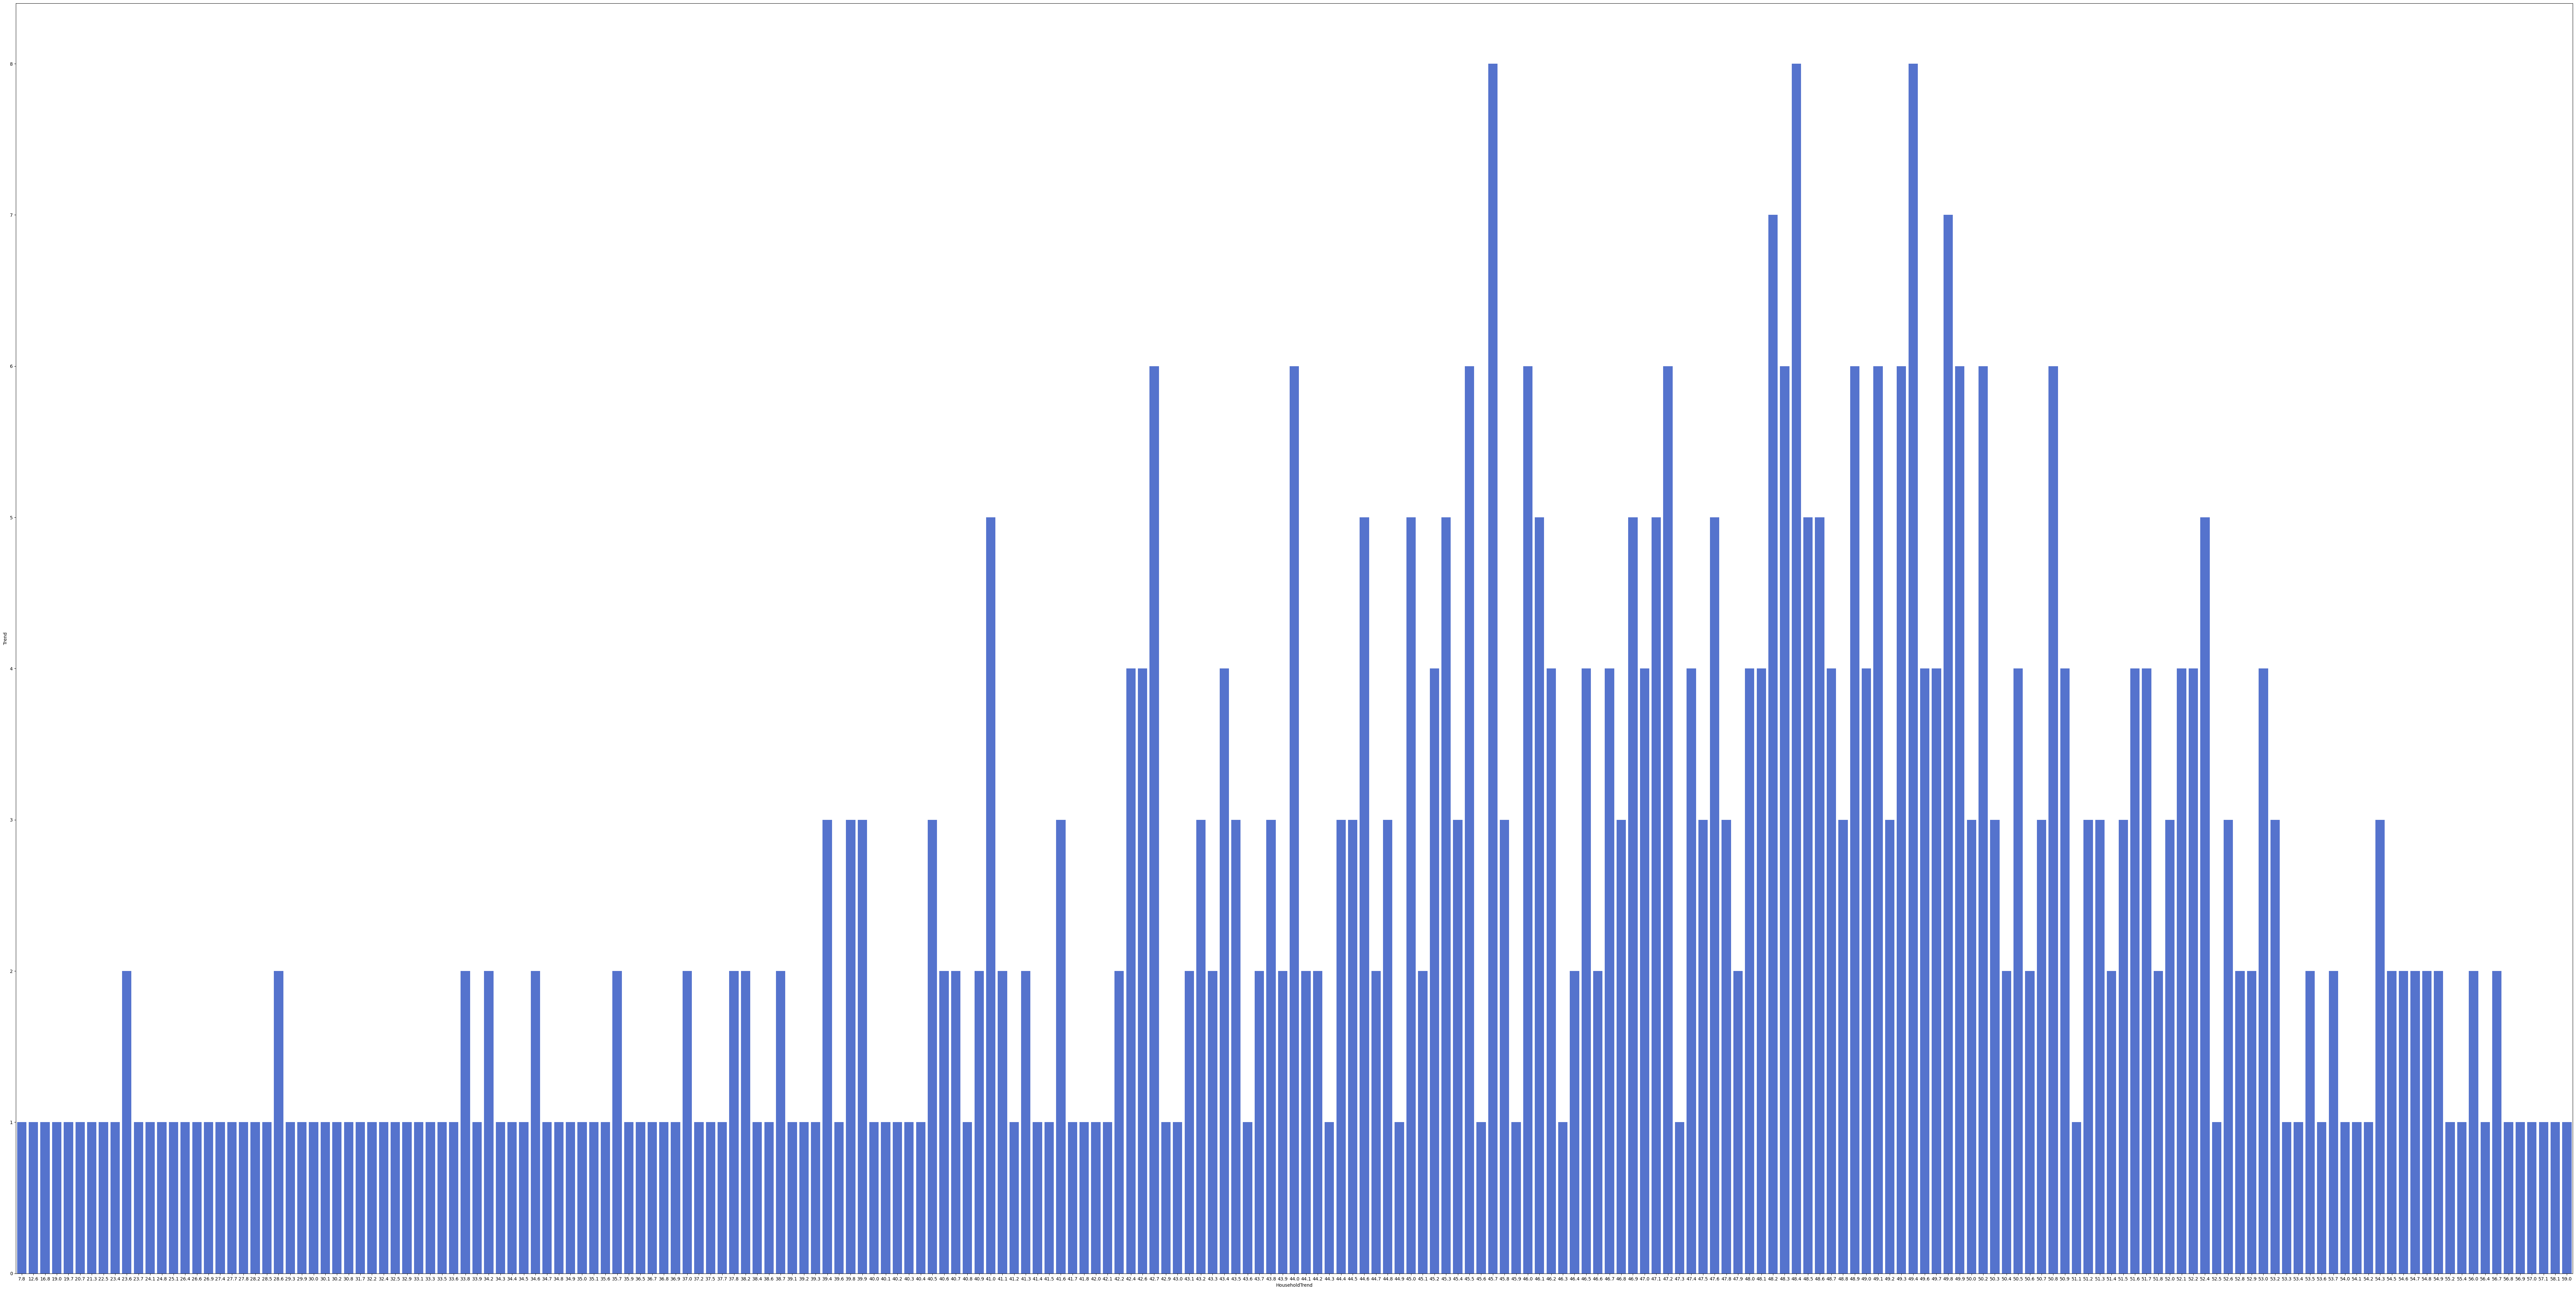

In [21]:
plt.figure(figsize=(100,50))
sns.barplot(x=Household['HouseholdTrend'], y=Household['Trend'], color='royalblue')

In [22]:
CorporateTrend = df.groupby('CorporateTrend_Manufacturing').count()[['CorporateTrend']].sort_values(by='CorporateTrend',ascending=True).reset_index()
CorporateTrend = CorporateTrend.rename(columns={'CorporateTrend':'Corporate'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

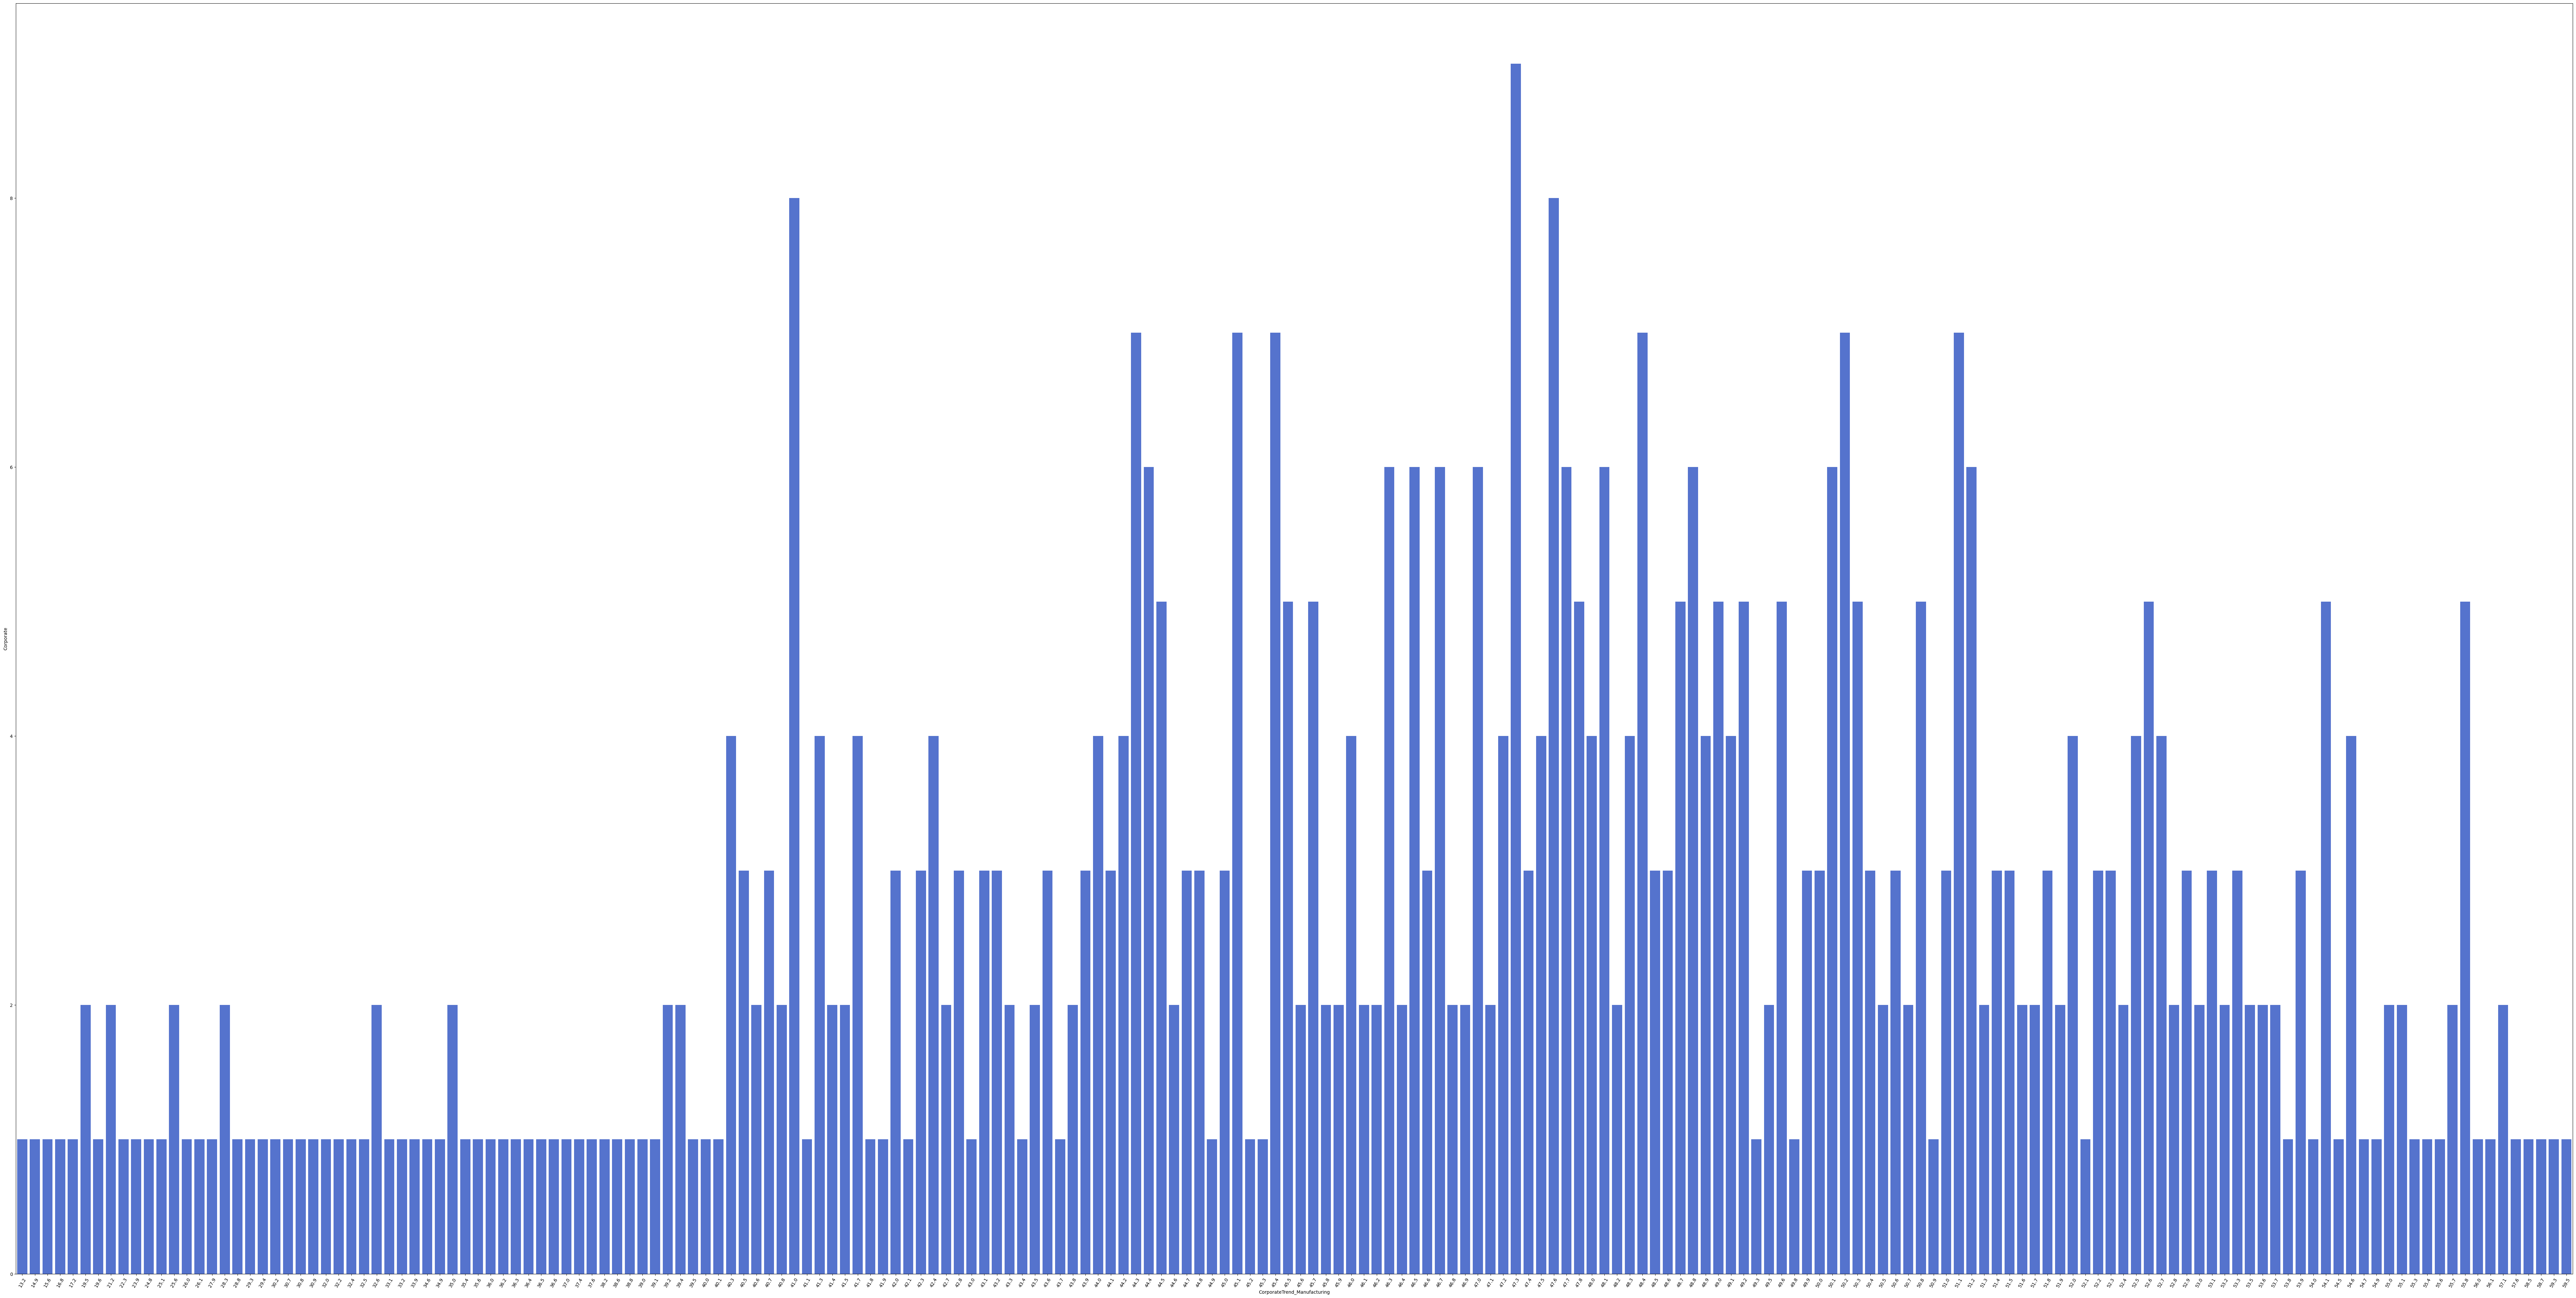

In [23]:
fig = plt.figure(figsize=(100,50))
sns.barplot(x=CorporateTrend['CorporateTrend_Manufacturing'], y=CorporateTrend['Corporate'], color='royalblue')
plt.xticks(rotation=60)

In [30]:
features = ['year','month','day','HouseholdTrend','HouseholdTrend_Retail','HouseholdTrend_FoodService','HouseholdTrend_Services','HouseholdTrend_Housing','CorporateTrend','CorporateTrend_Manufacturing','CorporateTrend_NonManufacturing','Employment']
x = df[features]
y = df['Total']
x.shape, y.shape

((520, 12), (520,))

In [31]:
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(130,)

In [32]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [33]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9999696915907186


In [34]:
input_data = np.array([[2023,8,25,54.0,54.3,52.6,55.8,44.7,51.7,48.8,53.8,54.7]])

prediction = lr.predict(input_data)
print('Estimasi Total Diffusion :', prediction)

Estimasi Total Diffusion : [53.58905112]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
import pickle

filename = 'estimasi_diffusion_index_in_japan.sav'
pickle.dump(lr,open(filename,'wb'))

In [37]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9999696915907186
